In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def format_data(model):
    data = pd.read_csv("metrics_" + model + "_18_5_100_50.csv") 
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data.resample("1S", on="timestamp").sum()
    data['tvalue'] = data.index
    data['delta'] = (data['tvalue']-data['tvalue'][0])
    data['delta'] =data['delta'].apply(lambda x:int( x.value/ 10**9))
    data.set_index('delta', inplace=True)
    data = data[(data.T != 0).any()]
    data[model+"_size_batch_training"]=data["size_batch_training"]
    data[model+"_nb_url_sent"]=data["nb_url_sent"]
    return data[[model+"_nb_url_sent",model+"_size_batch_training"]]



In [4]:
data_rapids = format_data("rapids")
data_sklearn = format_data("sklearn")

df = pd.concat([data_rapids, data_sklearn], axis=1)
df["avg_nb_url_sent"]=df[["rapids_nb_url_sent","sklearn_nb_url_sent"]].mean(axis=1)
df.drop(["rapids_nb_url_sent","sklearn_nb_url_sent"], axis=1, inplace=True)
df.head()

,rapids_size_batch_training,sklearn_size_batch_training,avg_nb_url_sent
delta,,,
0,1.0,72.0,715.0
1,3390.0,1683.0,4060.0
2,3346.0,1618.0,4438.5
3,3436.0,1722.0,4490.0
4,3928.0,2222.0,4936.0


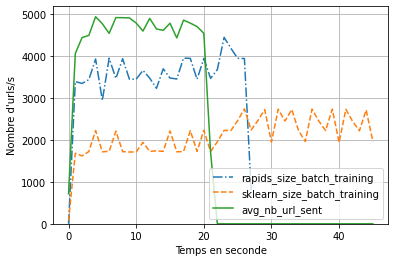

In [5]:
styles = ['-.','--',"-"]

df.plot(style=styles)
plt.xlabel("Temps en seconde")
plt.ylabel("Nombre d'urls/s")
plt.grid(True, which="major", ls="-")
plt.ylim(bottom=0)
# start avec y=0
plt.savefig('test_sklearn_vs_rapids.svg') 